# Exercise on the dataset Blé
The dataset is made up of 2 factors and 1 response. The questions are:
* Perform an analysis on variance with one factors and then with two factors.
* What kind of questions can we answer from that dataset?

## Loading the dataset
Having a look at the dataset (a text file), we can see there is an header. Here's the first lines of the data set:

|parcelle|variete|phyto|rdt|
|----|----|----|----|
|1|V1|Avec|5652|
|2|V1|Avec|5583|

In [1]:
dataset_ble = read.table("Dataset_Ble.txt", header=TRUE, sep =";")

In [2]:
head(dataset_ble)

,parcelle,variete,phyto,rdt
,<int>,<fct>,<fct>,<int>
1,1,V1,Avec,5652
2,2,V1,Avec,5583
3,3,V1,Avec,5612
4,4,V1,Avec,5735
5,5,V1,Avec,5704
6,6,V1,Avec,5544


In [3]:
summary(dataset_ble)

    parcelle     variete  phyto         rdt      
 Min.   : 1.00   V1:20   Avec:40   Min.   :5268  
 1st Qu.:20.75   V2:20   Sans:40   1st Qu.:5482  
 Median :40.50   V3:20             Median :5606  
 Mean   :40.50   V4:20             Mean   :5609  
 3rd Qu.:60.25                     3rd Qu.:5718  
 Max.   :80.00                     Max.   :5947  

In [4]:
attach(dataset_ble)

## ANalysis Of VAriance (ANOVA) with one factor
**ANOVA**, one-way analysis of variance also known as **one-factor ANOVA**, is an extension of independent **two-samples t-test** for comparing means in a situation where there are more than two groups.

That is, the important point here is that it is used to compare **means**. The ANOVA test hypothesis are:
* **Null hypothesis (H0)**: the means of the different groups are the same, **=>** the factor has NO significant influence,
* **Alternative hypothesis (H1)**: At least one sample mean is not equal to the others, **=>** at least one factor has a significant influence.

### Assumptions for ANOVA
These assumptions **must be** verified.

<div>
<ol>
    <li>The observations are obtained independently and randomly,</li>
    <li>Groups are identically distributed, i.e. homogeneity of variances a.k.a <b>Homoscedacity</b>,</li>
    <li>Gaussianity of the noise.</li>
</ol>

## Using ```Variete``` as a factor
**->** We're therefore analysing here **4 groups** (each group being of size 20). Let's do a boxplot to quickly visualise potential influence of Variete on Rendement:

In [50]:
# Set plot width and height
options(repr.plot.width=10, repr.plot.height=10)

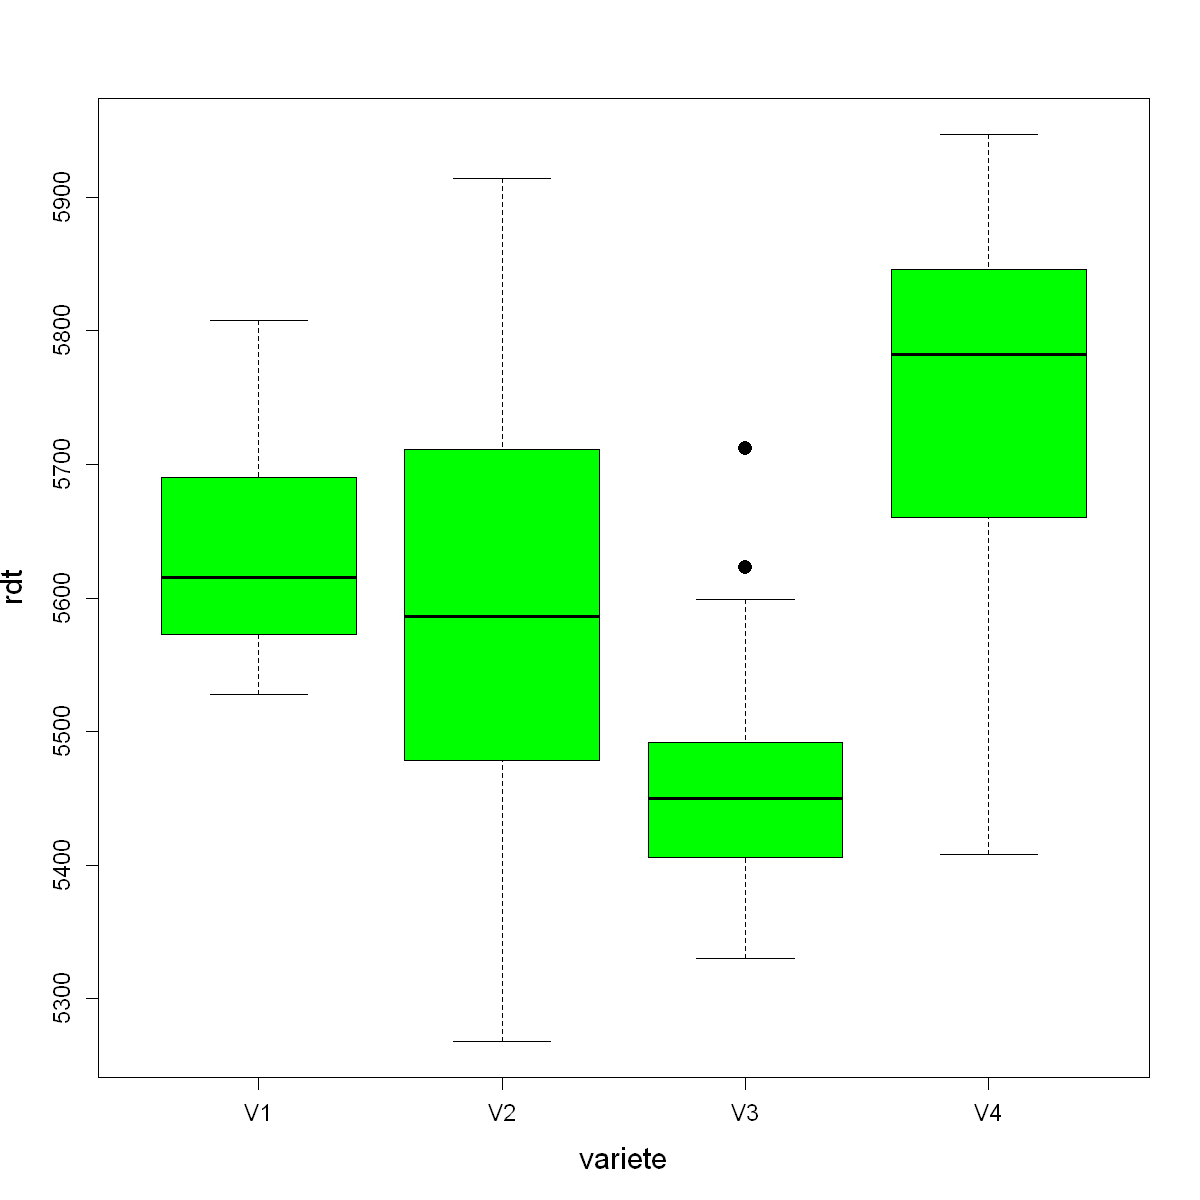

In [49]:
plot(rdt~variete, data=dataset_ble, pch=16, cex=1.5, cex.lab=1.5, cex.axis=1.2, col="green")

<div class="alert alert-block alert-success">
    <b>Quick analysis on this plot:</b> It seems that Variete V1 & V2 have quite a similar influence on the rendement, although V2 seems to have a bigger variance, whereas V3 and V4 has a different influence all together. V4 seems to give the best rendement.
    <p>It seems the <b>Variete</b> variable may have an influence on the rendement. Let's run the <b>ANOVA</b> test to confirm.</p>
</div>

### Performing ANOVA test
We'll use **aov()** R function.

In [6]:
result_aov = aov(rdt~variete, data = dataset_ble)
summary(result_aov)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
variete      3  851845  283948   20.52 7.67e-10 ***
Residuals   76 1051387   13834                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<div class="alert alert-block alert-success">
    <b>Interpretation:</b> Here we have p-value=<b>7.67e-10</b> for this Fisher test significantly less than <b>0.05</b>, so <b>we reject H0</b>, i.e. there are significant differences in mean between the different <b>variete</b>.
</div>

### Pairwise-comparison between groups
The ANOVA test shows that at least one mean of the group (V1, V2, V3, V4) is different, but it does not provide indication on which group(s) are different. For this we need to perform a pairwise-comparison. It can be done by:
* Tukey test or Tukey's Honest Significant Difference(HSD) test,
* Pairwise t-test.

#### Tukey HSD test
The R function TukeyHD() takes the fitted ANOVA as an argument.

In [7]:
TukeyHSD(result_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rdt ~ variete, data = dataset_ble)

$variete
        diff        lwr       upr     p adj
V2-V1  -49.7 -147.40144  48.00144 0.5430118
V3-V1 -169.2 -266.90144 -71.49856 0.0001163
V4-V1  118.4   20.69856 216.10144 0.0111177
V3-V2 -119.5 -217.20144 -21.79856 0.0101961
V4-V2  168.1   70.39856 265.80144 0.0001297
V4-V3  287.6  189.89856 385.30144 0.0000000


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The confidence levels and p-values show there are significant between-group differences of mean for all groups <b>except V2-V1</b> (that's the only pair containing 0 in the confidence interval and an adjusted <b>p-value=0.5430118</b> > our alpha = 0.05).
    <p>This is clearly confirmed by the plot below.</p> 
</div>

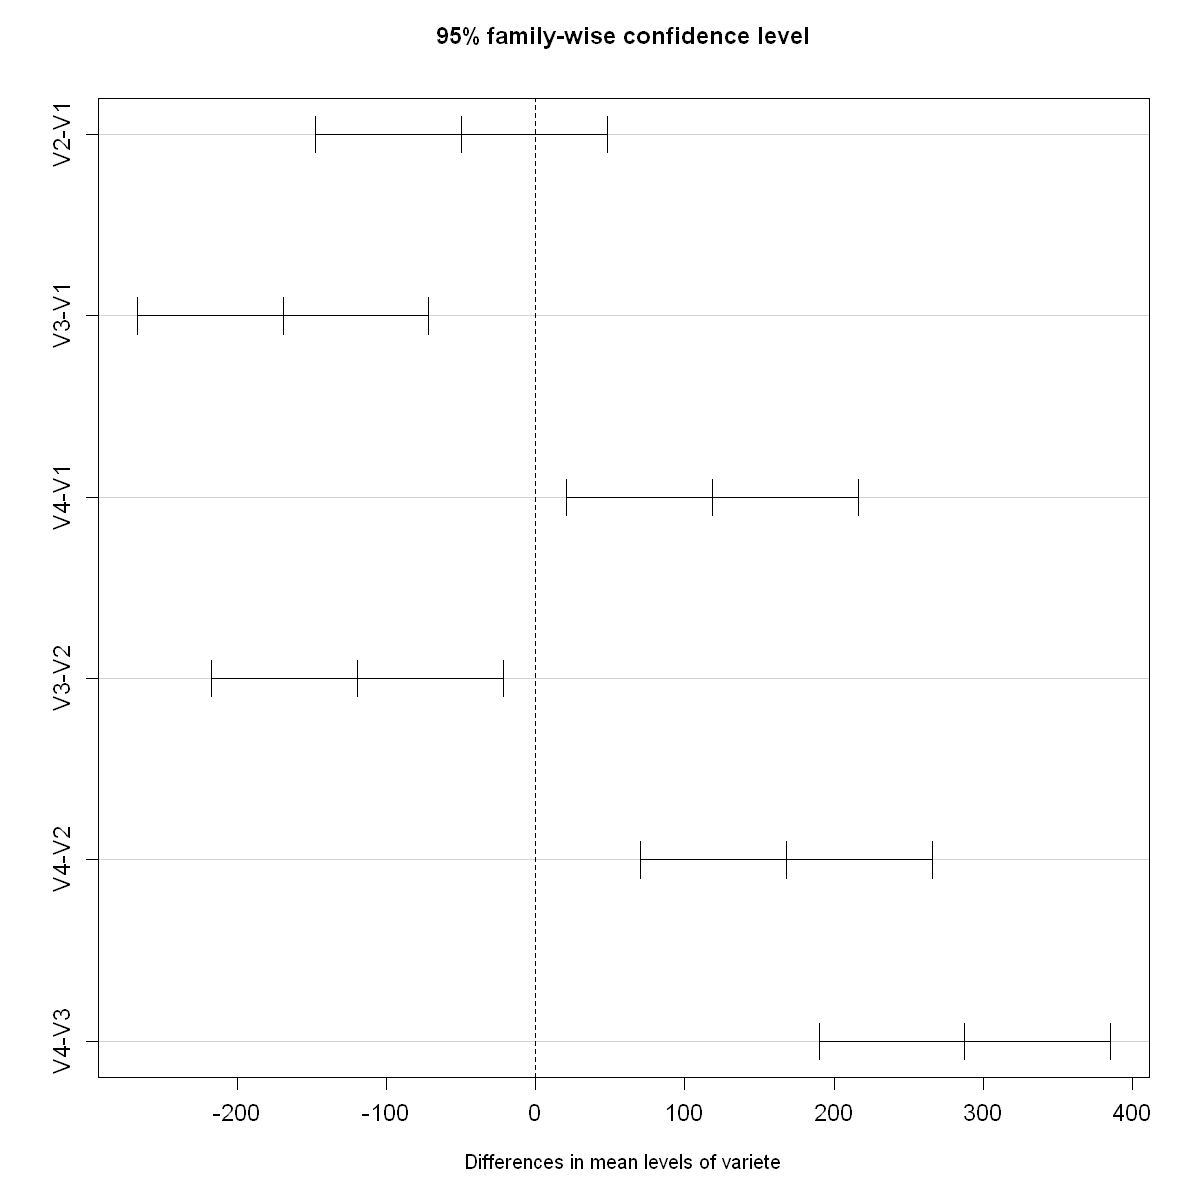

In [8]:
plot(TukeyHSD(result_aov), cex=1.5, cex.lab=1.5, cex.axis=1.2, col="black")

#### Pairwise t-test
Pairwise test with **Bonferroni** adjustment of p-value (**Bonferroni** is often considered overly conservative).

In [9]:
pairwise.t.test(dataset_ble$rdt, dataset_ble$variete,p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  dataset_ble$rdt and dataset_ble$variete 

   V1      V2      V3     
V2 1.00000 -       -      
V3 0.00012 0.01157 -      
V4 0.01266 0.00013 2.1e-10

P value adjustment method: bonferroni 

<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The adjusted p-values confirm the significant between-group differences of mean for all groups <b>except V2-V1</b>.
</div>

### Verifying ANOVA test assumptions
The results above are only valid if the assumptions of the **ANOVA** test are verified. Let's try to confirm they are.

#### 1. The observations are obtained independently and randomly
It might be difficult to confirm, but there's no reason to believe observations of each group are not independent, assuming each parcelle is pysically different one from another.

#### 2. Groups are identically distributed, i.e. Homoscedacity
We can use several tests to verify the homogeneity of the variance of each group:
* Looking at the **residuals versus fits** plot,
* **Compute variance** of each label and compare. *Potential issue here is that with low number of observations, the variances could look different whereas they are identical*.
* **Bartley test**
* **Levene test**

#### *Residuals vs fits plot*

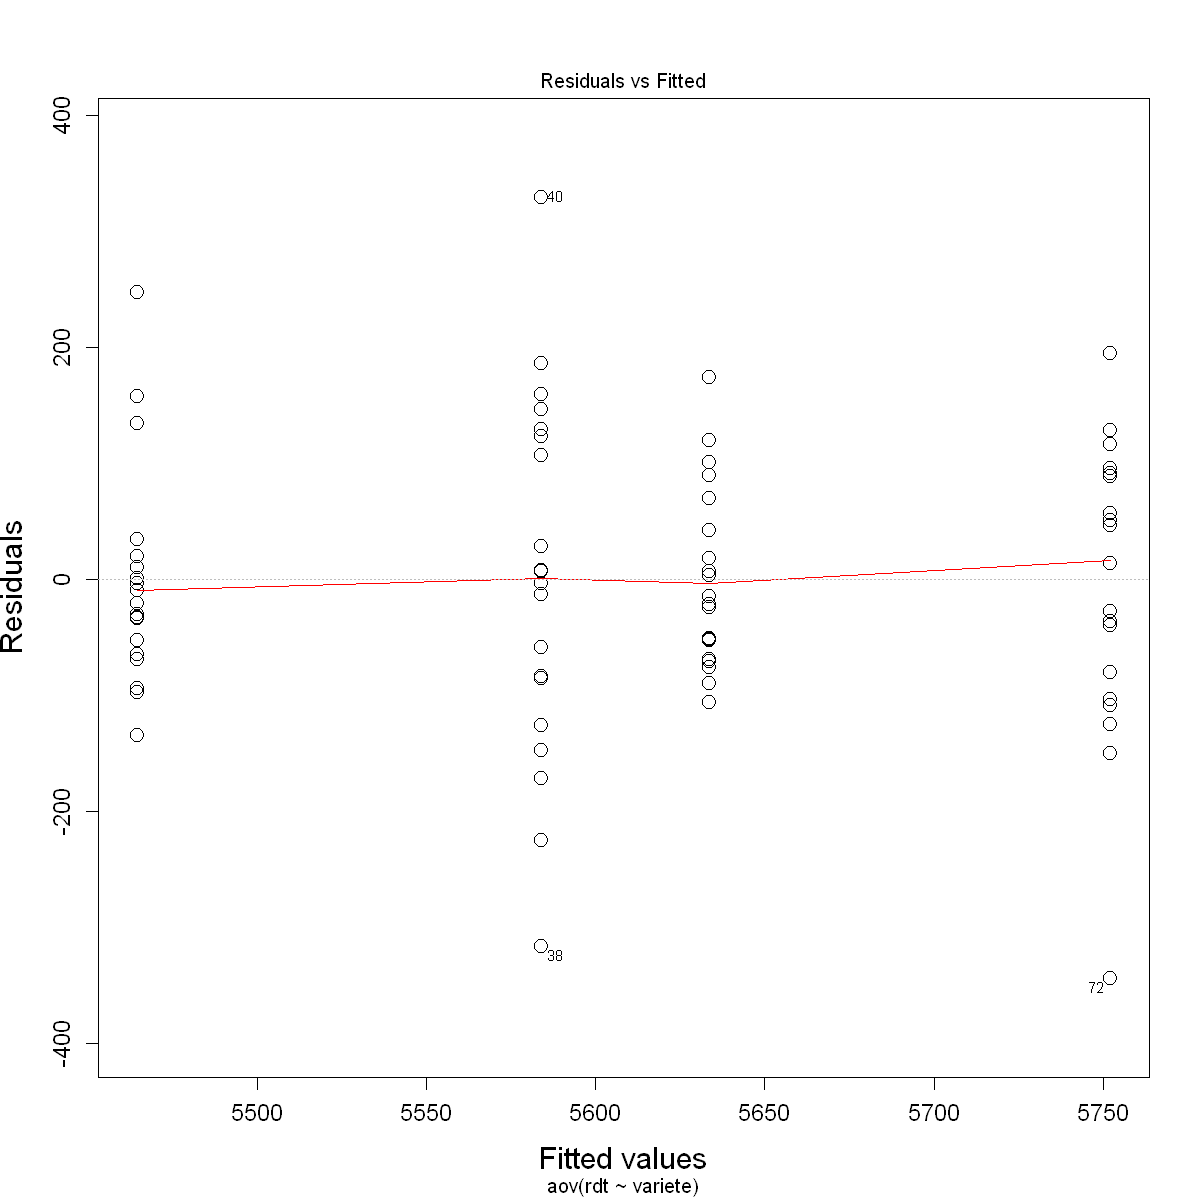

In [10]:
plot(result_aov, 1, cex=1.5, cex.lab=1.5, cex.axis=1.2)

<div class="alert alert-block alert-warning">
    <b>Warning:</b> Data points 38, 40 and 72 have been identified as outliers. They could (severely) affect normality and homogeneity of variance. It can be useful to remove these outliers to meet the test assumptions.
</div>

<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The outliers apart, the plot shows no evident relationships between residuals and fitted values (the mean of each group), which is good.
    <p>We can assume the homogeneity of variances.</p>
</div>

#### *Bartlett test*
Bartlett test is used for testing homogeneity of variances in k groups, where k can be more than two. It’s adapted for normally distributed data. Details of the Levene test can be found at the end of the document, here : [Bartlett test](#lnk_bartlett_test).

In [11]:
bartlett.test(dataset_ble$rdt, dataset_ble$variete)


	Bartlett test of homogeneity of variances

data:  dataset_ble$rdt and dataset_ble$variete
Bartlett's K-squared = 11.086, df = 3, p-value = 0.01127


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The test shows a <b>p-value=0.01127</b> which is less than the significance level of 0.05. This suggests that there is evidence that the variance in rendement (rdt) is statistically significantly different for the four groups of variete.
    <p>I.e., we can <b>NOT</b> assume the homogeneity of variances.</p>
</div>

#### *Levene test*
The Levene test is a more robust alternative to the Bartlett test **when the distributions of the data are non-normal**. Details of the Levene test can be found at the end of the document, here : [Levene test](#lnk_levene_test).

The Levene test is part of the **CAR** (**C**ompanion to **A**pplied **R**egression) package (although it can also be found in the **lawstat** package).

In [37]:
#install.packages("car")

Installing package into 'C:/Users/Didier/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'stringi', 'pkgconfig', 'SparseM', 'MatrixModels', 'sp', 'haven', 'curl', 'data.table', 'readxl', 'openxlsx', 'tibble', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4'




package 'stringi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfu

Loading required package: carData



In [12]:
library(car)

Loading required package: carData



In [13]:
leveneTest(dataset_ble$rdt, dataset_ble$variete)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,3.215413,0.02748358
,76,NA,NA


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The <b>Levene</b> test seems to confirm the result of the <b>Bartlett</b> test, i.e. the <b>p-value=0.02748358</b> is less than the significance level of 0.05, i.e. the variance in rendement (rdt) is statistically significantly different for the four groups of variete.
    <p>We can <b>NOT</b> assume the homogeneity of variances.</p>
</div>

<div class="alert alert-block alert-warning">
    <b>What can we do when the homogeneity of variance assumption is violated?</b>
    <p>There are alternative procedures (i.e.: **Welch one-way test**) that do not require the homogeneity of variance assumption. They can be used through  have been implemented in the function oneway.test().
    <ul>
        <li>Use an alternative procedures (i.e.: <b>Welch one-way test</b> that do not require the assumption on the homogeneity of variance. Use the R oneway.test() function, i.e.:
            <p><b>oneway.test(rdt~variete, data = dataset_ble)</b></p>
        </li>
        <li>Use a pairwise t-tests with no assumption of equal variances, i.e.:
            <p><b>pairwise.t.test(dataset_ble\$rdt, dataset_ble\$variete, p.adjust.method = "BH", pool.sd = FALSE)</b></p>
        </li>
    </ul>
</div>

#### 3. Gaussianity of the noise
We can use several methods to verify nomality of the noise:
* Looking at the **Normal Q-Q (Quantile-Quantile)** plot. The Q-Q plot shows the quantiles of the residuals plotted against the quantiles of the normal distribution. A 45-degree reference line is also plotted. The residuals plot should approximately follow the reference line.
* **Shapiro-Wilk test** on the ANOVA residuals.

#### *Normal Q-Q plot*

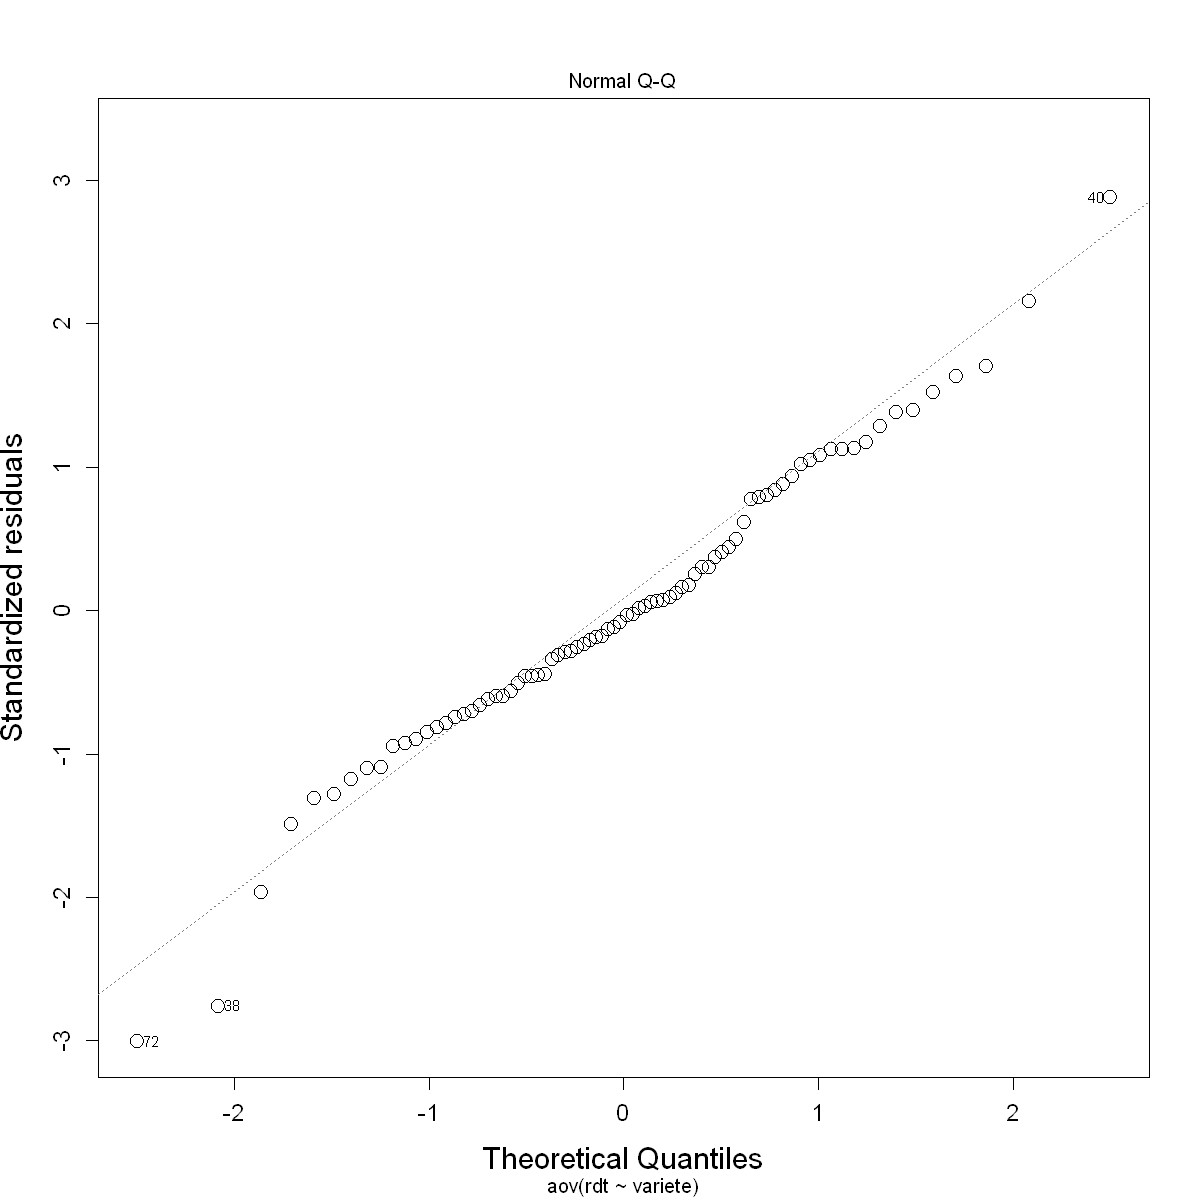

In [14]:
plot(result_aov, 2, cex=1.5, cex.lab=1.5, cex.axis=1.2)

<div class="alert alert-block alert-success">
    <b>Interpretation:</b> Again, apart from the outliers apart, all the points fall approximately along the reference line.
    <p>We we can assume normality of the noise.</p>
</div>

#### *Shapiro-Wilk test*
The Shapiro–Wilk test is a test of normality. Details of the Shapiro–Wilk test can be found at the end of the document, here : [Shapiro-Wilk test](#lnk_shapiro_wilk_test).

We are performing the test on the **residuals** (from previous ANOVA test).

In [15]:
aov_residuals = residuals(result_aov)
shapiro.test(aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98117, p-value = 0.2872


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The Shapiro-Wilk test support the interpretation of the <b>Q-Q plot</b>, i.e. with a <b>p-value=0.2872</b> significantly greater than the standard alpha level of 0.05, we cannot reject H0.
    <p>We we can assume normality of the noise.</p>
</div>

<div class="alert alert-block alert-warning">
    <b>Overall conclusion for VARIETE:</b> The ANOVA test tends to show there could be an effect on Rendement (RDT) due to VARIETE, but our data does not conform to the ANOVA test assumption, particularly on the homogeneity of the variances.
    <br><br><b>What can we do here then??</b>
    <br><br><b>Also, how to conclude on which VARIETE is giving the best rendement? Simply by taking the greatest mean??</b>
</div>

## Using ```Phyto``` as a factor
**->** We're therefore analysing here **2 groups** (each group being of size 40). Let's do a boxplot to quickly visualise potential influence of Phyto on Rendement:

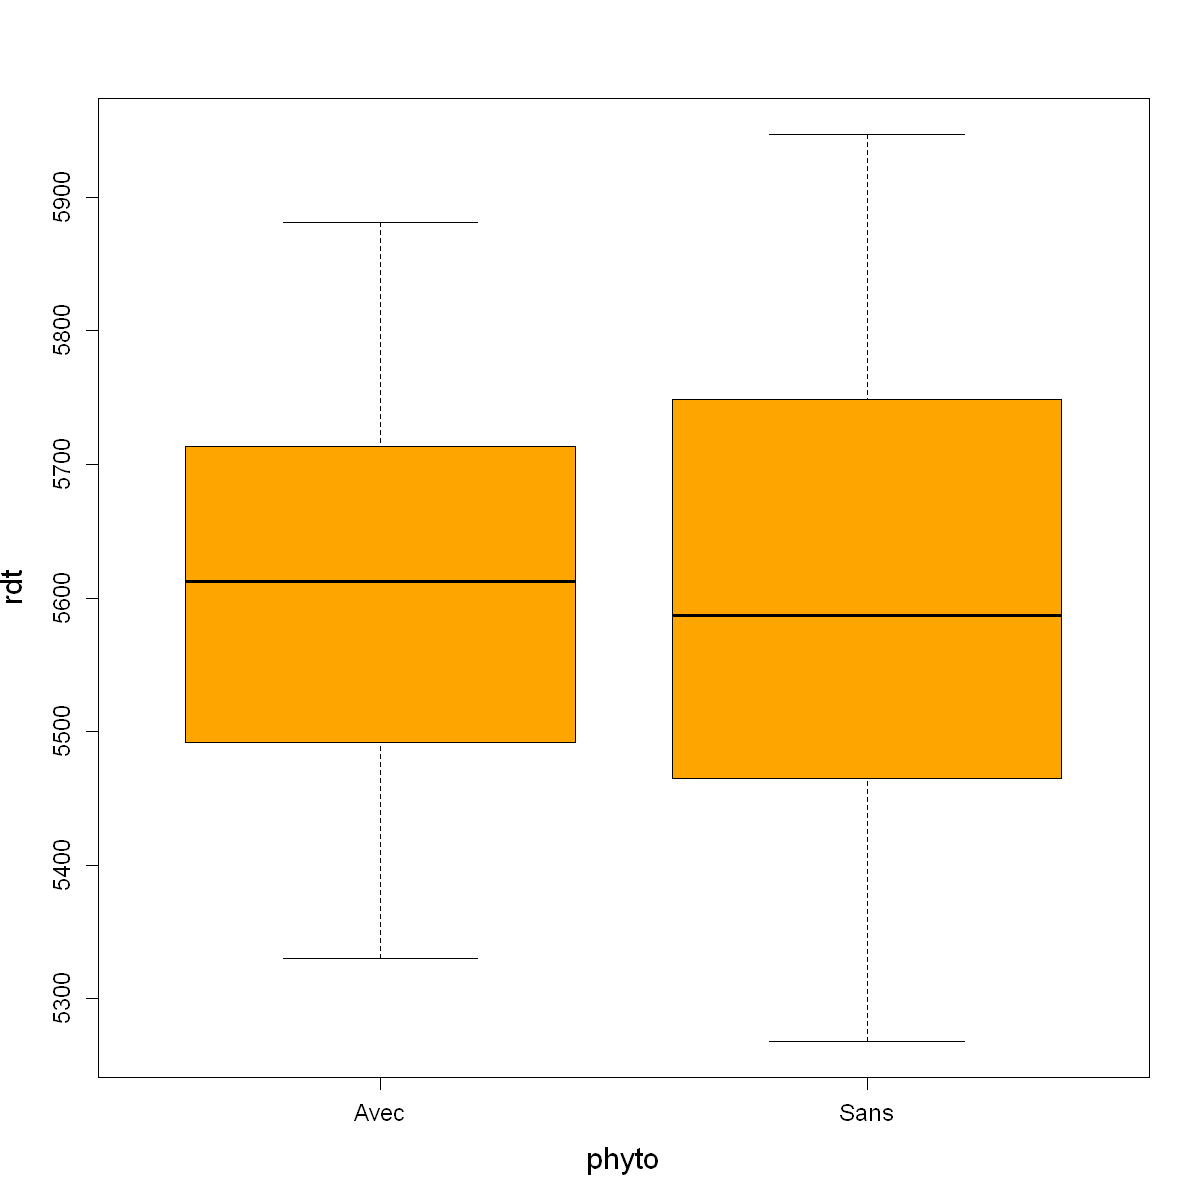

In [16]:
plot(rdt~phyto, data=dataset_ble, pch=16, cex=1.5, cex.lab=1.5, cex.axis=1.2, col="orange")

<div class="alert alert-block alert-success">
    <b>Quick analysis on this plot:</b> It seems that phyto Avec & Sans have quite a similar influence on the rendement, although Sans seems to have a bigger variance.
    <p>It seems the <b>phyto</b> variable does <b>not</b> have an influence on the rendement. Let's investigate further ...</p>
</div>

## Performing an unpaired two-samples T-test
We could perform an **ANOVA** test as previously for VARIETE, but because we have here only two groups, let's try something different, an **unpaired two-samples T-test**. This test is used to compare the mean of two **independent** groups. Details of the unpaired two-samples T-test can be found at the end of the document, here: [Unpaired two-samples T-test](#lnk_2_samples_t_test).
### Assumptions for unpaired two-samples t-test
These assumptions **must be** verified:

<div class="alert alert-block alert-warning">
<ol>
    <li>The observations are obtained independently and randomly,</li>
    <li>The two groups are normally distributed, </li>
    <li>Homogeneity of variances a.k.a <b>Homoscedacity</b>.</li>
</ol>

### Performing unpaired two-samples t-test
We'll use **t.test()** R function.

In [17]:
# Using t.test assuming variance of two groups are equal
# i.e. var.equal = TRUE
result_t_test = t.test(rdt~phyto, data=dataset_ble, var.equal = TRUE)
result_t_test


	Two Sample t-test

data:  rdt by phyto
t = 0.20332, df = 78, p-value = 0.8394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -62.41945  76.61945
sample estimates:
mean in group Avec mean in group Sans 
          5612.225           5605.125 


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The p-value of the test is 0.8394, which is significantly more than the significance level alpha = 0.05. We can conclude that <b>phyto SANS</b> and <b>phyto AVEC</b> groups have the same rendement mean.
    <p>The <b>phyto</b> variable does <b>not</b> have an influence on the rendement.
</div>

### Verifying unpaired two-samples t-test test assumptions
The results above are only valid if the assumptions of the **unpaired two-samples t-test** test are verified. Let's try to confirm they are.

#### 1. The observations are obtained independently and randomly
It might be difficult to confirm, but there's no reason to believe observations of each group are not independent, assuming each parcelle is pysically different one from another.

#### 2. The two groups are normally distributed
We can use a **Shapiro-Wilk test** on both groups.

In [18]:
group_phyto_sans = dataset_ble$rdt[dataset_ble$phyto=="Sans"]
group_phyto_avec = dataset_ble$rdt[dataset_ble$phyto=="Avec"]

In [19]:
shapiro.test(group_phyto_sans)


	Shapiro-Wilk normality test

data:  group_phyto_sans
W = 0.97647, p-value = 0.5607


In [20]:
shapiro.test(group_phyto_avec)


	Shapiro-Wilk normality test

data:  group_phyto_avec
W = 0.97296, p-value = 0.4444


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The Shapiro-Wilk test for both groups shows a p-value significantly greater than the standard alpha level of 0.05 which means we cannot reject H0.
    <p>We we can assume both groups are normally distributed.</p>
</div>

#### 3. Homogeneity of variances, i.e. Homoscedacity
Because we have two normally distributed groups, we could use a **F-test of equality of variances**. Details of the F-Test  can be found at the end of the document, here: [F-test of equality of variances](#lnk_f_test).

Neverthertheless, let's use a **Levene test**, supposedly more robust.

In [21]:
leveneTest(dataset_ble$rdt, dataset_ble$phyto)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.6849646,0.4104074
,78,NA,NA


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> With a <b>p-value=0.4104074</b> significantly greater than the significance level of 0.05, we cannot reject H0.
    <p>We can assume the homogeneity of variances fo the two groups.</p>
</div>

<div class="alert alert-block alert-warning">
If the variances of the two groups being compared are different (heteroscedasticity), it’s possible to use the <b>Welch t test</b>, an adaptation of Student t-test. This is done with the <b>t.test()</b> R function with parameter var.equal = FALSE, e.g.:
    <p><b>t.test(rdt~phyto, data=dataset_ble, var.equal = FALSE)</b></p>
</div>

<div class="alert alert-block alert-success">
    <b>Overall conclusion for PHYTO:</b> The assumptions for the <b>unpaired two-samples t-test</b> have been successfully verified, and the test has shown that there is no difference in rendement means for the two groups.
    <p><b>We can conclude the PHYTO variable has no influence on the rendement.</b></p>
</div>

## ANalysis Of VAriance with two factors (two-way ANOVA test)
**Two-way ANOVA test** is used to evaluate simultaneously the effect of two grouping variables (A and B) on a response variable. The level combinations of factors of these two grouping variables are called cell.
* When the sample sizes within cells are equal, we have the so-called **balanced design**. In this case the standard two-way ANOVA test can be applied.
* When the sample sizes within each level of the independent variables are not the same (case of **unbalanced design**), the ANOVA test should be handled differently.

The two-way ANOVA test hypothesis are:

**Null hypothesis (H0):**
1. There is no difference in the means of factor A
2. There is no difference in the means of factor B
3. There is no interaction between factors A and B

**Alternative hypothesis (H1):**
1. There is a difference in the means of factor A
2. There is a difference in the means of factor B
3. There is an interaction between A and B

### Assumptions for ANOVA
Basically the same assumptions as the one-way ANOVA apply for **each cell**. These assumptions **must be** verified:

<div class="alert alert-block alert-warning">
<ol>
    <li>The observations are obtained independently and randomly,</li>
    <li>Groups are identically distributed, i.e. homogeneity of variances a.k.a <b>Homoscedacity</b>,</li>
    <li>Gaussianity of the noise.</li>
</ol>

### Performing two-way ANOVA test
Let's first check if we have a balanced or un-balanced design.

In [22]:
table(dataset_ble$variete, dataset_ble$phyto)

    
     Avec Sans
  V1   10   10
  V2   10   10
  V3   10   10
  V4   10   10

<div class="alert alert-block alert-success">
    <b>We have a balanced design</b>, 4x2 cells with 10 components in each cell.
</div>

### Some plots

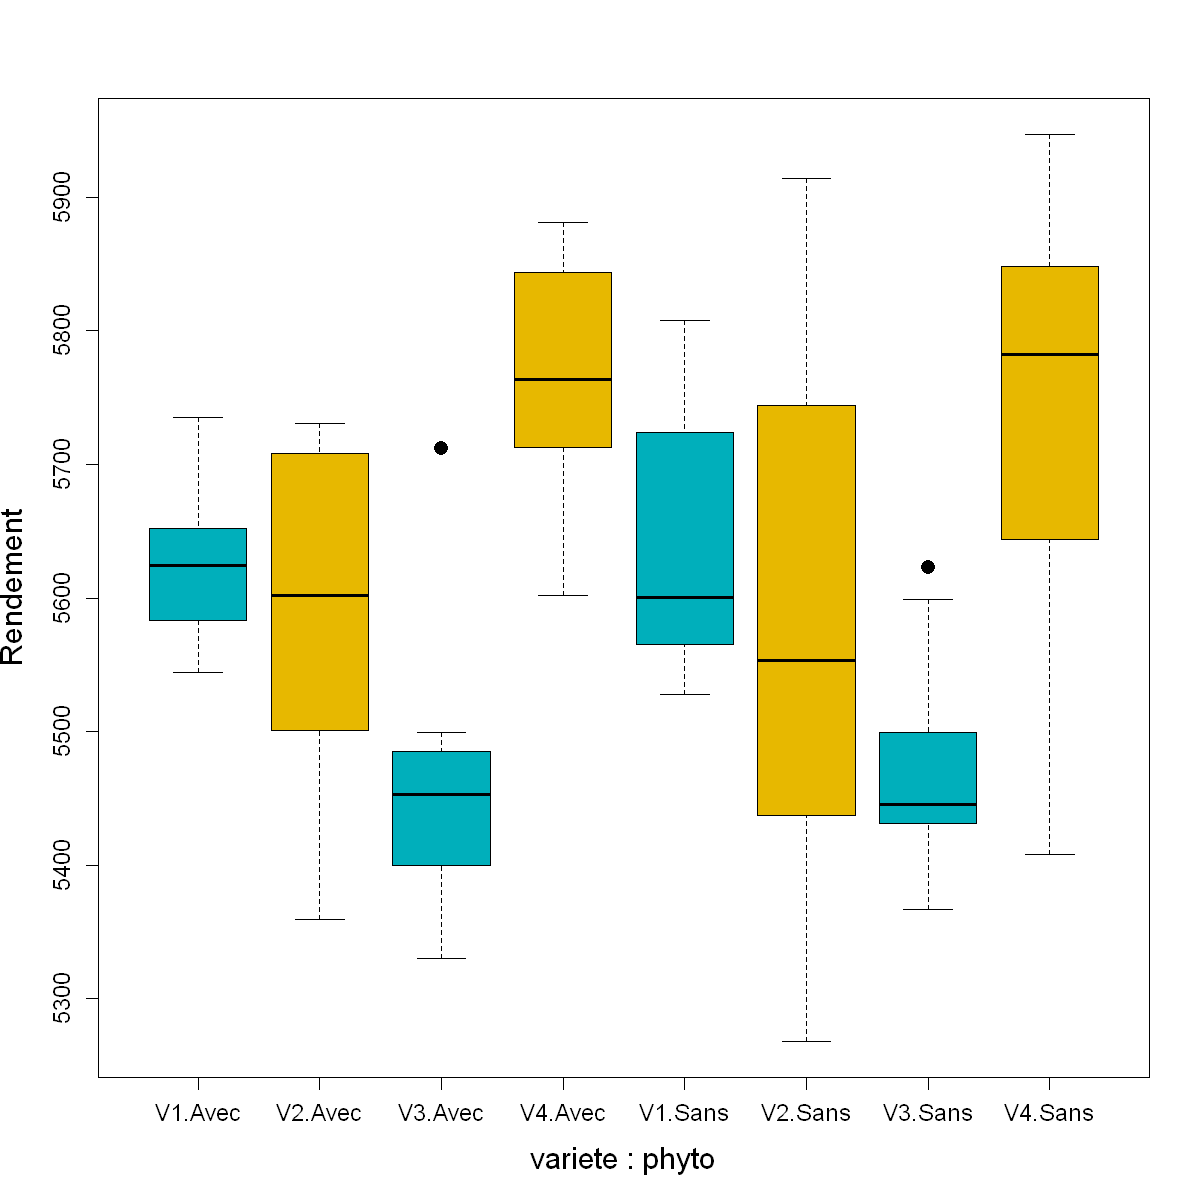

In [36]:
# Box plot with two factor variables
boxplot(rdt ~ variete*phyto, data = dataset_ble,
        pch=16, cex=1.5, cex.lab=1.5, cex.axis=1.2,
        col = c("#00AFBB", "#E7B800"),
        ylab="Rendement")

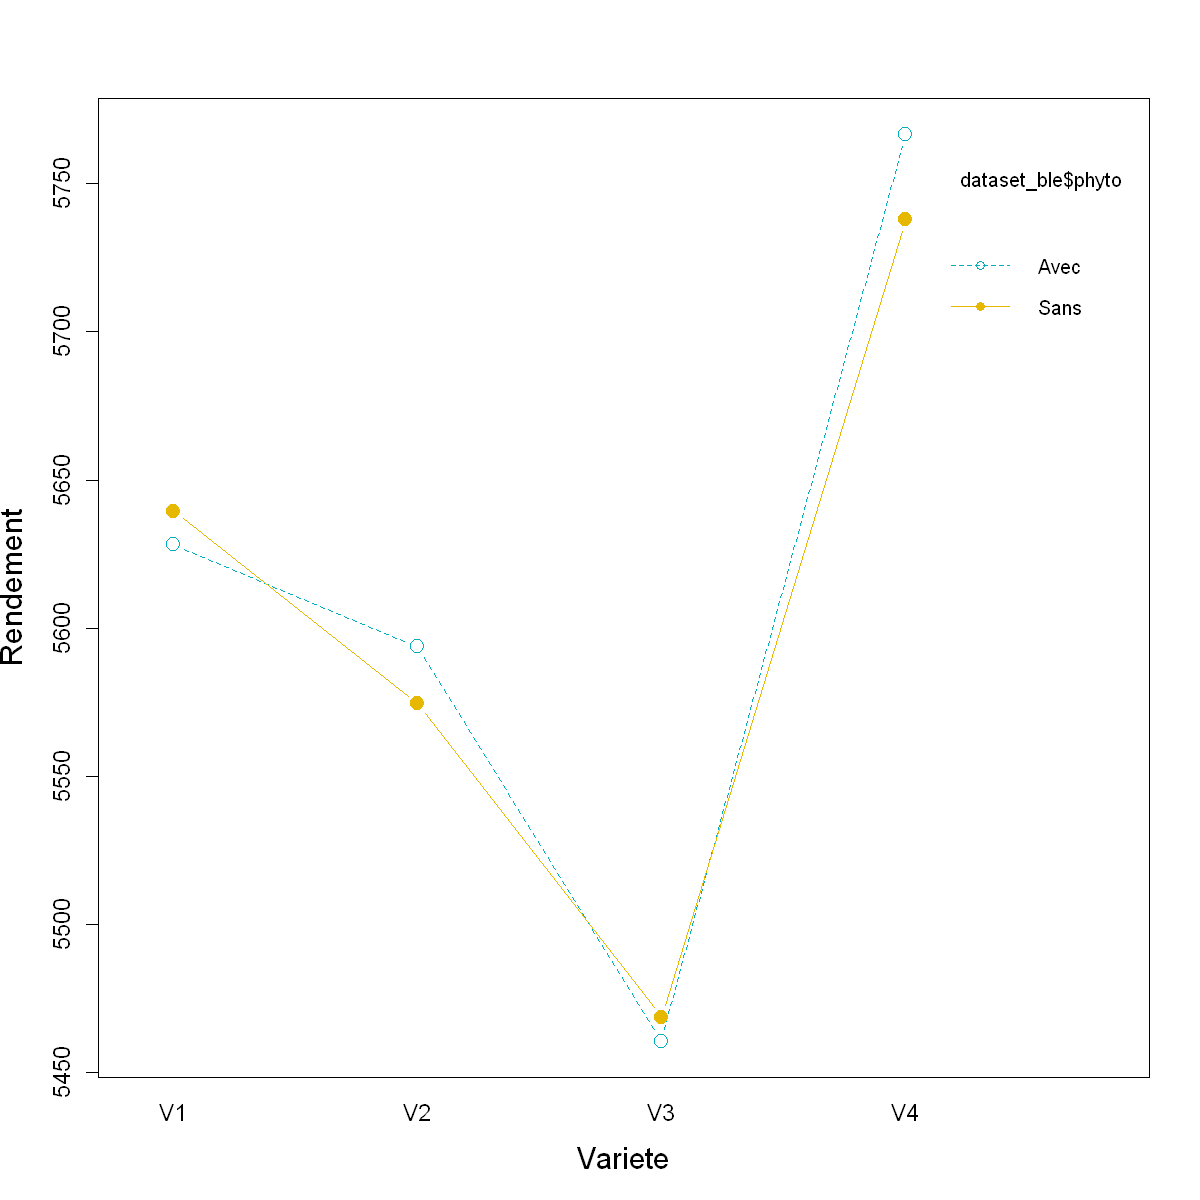

In [38]:
# Two-way interaction plot
interaction.plot(x.factor = dataset_ble$variete, trace.factor = dataset_ble$phyto, 
                 response = dataset_ble$rdt, fun = mean, 
                 type = "b", legend = TRUE, 
                 xlab = "Variete", ylab="Rendement",
                 pch=c(1,19), cex=1.5, cex.lab=1.5, cex.axis=1.2,
                 col = c("#00AFBB", "#E7B800"))

<div class="alert alert-block alert-success">
    OK, nice plots, but <b>difficult to get a clear conclusion</b> from these plots!
</div>

### Performing the two-way ANOVA test
We'll use **aov()** R function.

#### Additive model
(variete **+** phyto)

In [39]:
result_2_way_aov = aov(rdt ~ variete + phyto, data = dataset_ble)
summary(result_2_way_aov)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
variete      3  851845  283948  20.275 1.01e-09 ***
phyto        1    1008    1008   0.072    0.789    
Residuals   75 1050379   14005                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<div class="alert alert-block alert-success">
This confirms what we found earlier thanks to the one-way ANOVA test, i.e. <b>VARIETE</b> has an impact on the rendement, whereas <b>PHYTO</b> has not. We do not have any information though on the possible effect of the combination of <b>VARIETE</b> and <b>PHYTO</b>.
</div>

#### Interaction model
(variete * phyto)

In [41]:
result_2_way_aov_interact = aov(rdt ~ variete * phyto, data = dataset_ble)
summary(result_2_way_aov_interact)

              Df  Sum Sq Mean Sq F value   Pr(>F)    
variete        3  851845  283948  19.575 2.21e-09 ***
phyto          1    1008    1008   0.070    0.793    
variete:phyto  3    5968    1989   0.137    0.938    
Residuals     72 1044411   14506                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

<div class="alert alert-block alert-success">
This interaction model indicates that the interaction between <b>VARIETE</b> and <b>PHYTO</b> is not significant, i.e. it does not have an effect of rendement.
</div>

#### Summary of the interaction model
Showing means for the different factors and cells.

In [42]:
model.tables(result_2_way_aov_interact, type="means", se = TRUE)

Tables of means
Grand mean
         
5608.675 

 variete 
variete
  V1   V2   V3   V4 
5634 5584 5465 5752 

 phyto 
phyto
Avec Sans 
5612 5605 

 variete:phyto 
       phyto
variete Avec Sans
     V1 5628 5640
     V2 5594 5574
     V3 5460 5469
     V4 5767 5738

Standard errors for differences of means
        variete phyto variete:phyto
          38.09 26.93         53.86
replic.      20    40            10

### Verifying two-way ANOVA test assumptions
As we've done for the one-way ANOVA test, let's (quickly this time) confirm the test assumptions.

#### 1. The observations are obtained independently and randomly
It might be difficult to confirm, but there's no reason to believe observations of each **cell** are not independent, assuming each parcelle is pysically different one from another.

#### 2. Groups are identically distributed, i.e. Homoscedacity
Let's use a **Levene test**.

In [44]:
leveneTest(rdt ~ variete*phyto, data = dataset_ble)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,7,1.881501,0.08512523
,72,NA,NA


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The <b>p-value=0.08512523</b> is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. 
    <p><b>We can assume the homogeneity of variances.</b></p>
</div>

#### 3. Gaussianity of the noise
We'll use a **Shapiro-Wilk test** on the ANOVA residuals.

In [48]:
aov_interact_residuals = residuals(result_2_way_aov_interact)
shapiro.test(aov_interact_residuals)


	Shapiro-Wilk normality test

data:  aov_interact_residuals
W = 0.98246, p-value = 0.342


<div class="alert alert-block alert-success">
    <b>Interpretation:</b> The Shapiro-Wilk test with a <b>p-value=0.342</b> significantly greater than the standard alpha level of 0.05 indicates we cannot reject <b>H0</b>.
    <br><b>We can assume normality of the noise.</b>
</div>

## Overall conclusion

<div class="alert alert-block alert-success">
    <ol>
        <li><b>VARIETE</b> has an impact on the mean of the <b>RENDEMENT</b>. <b>V4</b> variete seems to have the best rendement with a mean of 5752</li>
        <li><b>PHYTO</b> does not have an impact on the <b>RENDEMENT</b>.</li>
        <li>The interaction (<b>VARIETE, PHYTO</b>) does neither have an impact on the <b>RENDEMENT</b>.</li>
    </ol>
</div>

___

# Links
Some links to tutorials in relation to the content of that notebook:
* [One way ANOVA test in R](http://www.sthda.com/english/wiki/one-way-anova-test-in-r)
* [Unpaired two samples test in R](http://www.sthda.com/english/wiki/unpaired-two-samples-t-test-in-r)
* [Two way ANOVA test in R](http://www.sthda.com/english/wiki/two-way-anova-test-in-r)

# Additional details on some statistical tests
(mostly from wikipedia)

<a id="lnk_levene_test"></a>
## Levene test
* **Null hypothesis (H0)**: the variances of the different groups are equal, **=>** homogeneity of the variances a.k.a. homoscedascity,
* **Alternative hypothesis (H1)**: At least one sample variance is not equal to the others, **=>** heteroscedascity.

<div class="alert alert-block alert-info">
Levene's test is equivalent to a 1-way between-groups analysis of variance (ANOVA) with the dependent variable being the absolute value of the difference between a score and the mean of the group to which the score belongs (shown below as ${\displaystyle Z_{ij}=|Y_{ij}-{\bar {Y}}_{i\cdot }|}$). The test statistic, ${\displaystyle W}$, is equivalent to the ${\displaystyle F}$ statistic that would be produced by such an ANOVA, and is defined as follows:

$${\displaystyle W={\frac {(N-k)}{(k-1)}}\cdot {\frac {\sum _{i=1}^{k}N_{i}(Z_{i\cdot }-Z_{\cdot \cdot })^{2}}{\sum _{i=1}^{k}\sum _{j=1}^{N_{i}}(Z_{ij}-Z_{i\cdot })^{2}}},}$$

where

* ${\displaystyle k}$ is the number of different groups to which the sampled cases belong,
* ${\displaystyle N_{i}}$ is the number of cases in the ${\displaystyle i}$th group,
* ${\displaystyle N}$ is the total number of cases in all groups,
* ${\displaystyle Y_{ij}}$ is the value of the measured variable for the ${\displaystyle j}$th case from the ${\displaystyle i}$th group,
* ${\displaystyle Z_{ij}={\begin{cases}|Y_{ij}-{\bar {Y}}_{i\cdot }|,&{\bar {Y}}_{i\cdot }{\text{ is a mean of the }}i{\text{-th group}},\\|Y_{ij}-{\tilde {Y}}_{i\cdot }|,&{\tilde {Y}}_{i\cdot }{\text{ is a median of the }}i{\text{-th group}}.\end{cases}}}$

(Both definitions are in use though the second one is, strictly speaking, the Brown–Forsythe test – see below for comparison.)

* ${\displaystyle Z_{i\cdot }={\frac {1}{N_{i}}}\sum _{j=1}^{N_{i}}Z_{ij}}$ is the mean of the ${\displaystyle Z_{ij}}$ for group ${\displaystyle i}$,
* ${\displaystyle Z_{\cdot \cdot }={\frac {1}{N}}\sum _{i=1}^{k}\sum _{j=1}^{N_{i}}Z_{ij}}$ is the mean of all ${\displaystyle Z_{ij}}$.

The test statistic ${\displaystyle W}$ is approximately F-distributed with ${\displaystyle k-1}$ and ${\displaystyle N-k}$ degrees of freedom, and hence is the significance of the outcome ${\displaystyle w}$ of ${\displaystyle W}$ tested against ${\displaystyle F(\alpha ,k-1,N-k)}$ where ${\displaystyle F}$ is a quantile of the F-distribution, with ${\displaystyle k-1}$ and ${\displaystyle N-k}$ degrees of freedom, and ${\displaystyle \alpha }\alpha$ is the chosen level of significance (usually 0.05 or 0.01).
</div>

<a id="lnk_bartlett_test"></a>
## Bartlett test
* **Null hypothesis (H0)**: the variances of the different groups are equal, **=>** homogeneity of the variances a.k.a. homoscedascity,
* **Alternative hypothesis (H1)**: At least one sample variance is not equal to the others, **=>** heteroscedascity.

<div class="alert alert-block alert-info">
If there are k samples with sizes ${\displaystyle n_{i}}$ and sample variances ${\displaystyle S_{i}^{2}}$ then Bartlett's test statistic is:

${\displaystyle \chi ^{2}={\frac {(N-k)\ln(S_{p}^{2})-\sum _{i=1}^{k}(n_{i}-1)\ln(S_{i}^{2})}{1+{\frac {1}{3(k-1)}}\left(\sum _{i=1}^{k}({\frac {1}{n_{i}-1}})-{\frac {1}{N-k}}\right)}}}$

where ${\displaystyle N=\sum _{i=1}^{k}n_{i}}$ and ${\displaystyle S_{p}^{2}={\frac {1}{N-k}}\sum _{i}(n_{i}-1)S_{i}^{2}}$ is the pooled estimate for the variance.

The test statistic has approximately a ${\displaystyle \chi _{k-1}^{2}}$ distribution. Thus the null hypothesis is rejected if ${\displaystyle \chi ^{2}>\chi _{k-1,\alpha }^{2}}$ (where ${\displaystyle \chi _{k-1,\alpha }^{2}}$ is the upper tail critical value for the ${\displaystyle \chi _{k-1}^{2}}$ distribution).

Bartlett's test is a modification of the corresponding likelihood ratio test designed to make the approximation to the ${\displaystyle \chi _{k-1}^{2}}$ distribution better (Bartlett, 1937).
</div>

<a id="lnk_shapiro_wilk_test"></a>
## Shapiro-Wilk test
* **Null hypothesis(H0)**: the population is normally distributed. If the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are **not normally distributed**.
* **Alternative hypothesis (H1)**: the data does not come from a normally distributed population.

<div class="alert alert-block alert-info">
The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population. The test statistic is

${\displaystyle W={\left(\sum _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}},}$

<p>where:</p>

${\displaystyle x_{(i)}}$ (with parentheses enclosing the subscript index i; not to be confused with ${\displaystyle x_{i}}$) is the ith order statistic, i.e., the ith-smallest number in the sample;
${\displaystyle {\overline {x}}=\left(x_{1}+\cdots +x_{n}\right)/n}$ is the sample mean.

<p>The coefficients ${\displaystyle a_{i}}$ are given by:</p>

${\displaystyle (a_{1},\dots ,a_{n})={m^{\mathsf {T}}V^{-1} \over C},}$
    
<p>where C is a vector norm:</p>

${\displaystyle C=\|V^{-1}m\|=(m^{\mathsf {T}}V^{-1}V^{-1}m)^{1/2}}$
    
<p>and the vector m,</p>

${\displaystyle m=(m_{1},\dots ,m_{n})^{\mathsf {T}}\,}$
    
is made of the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution;
    <p>finally, ${\displaystyle V}$ is the covariance matrix of those normal order statistics.</p>
</div>

<a id="lnk_2_samples_t_test"></a>
## Unpaired two samples T-test
The test can support different research questions, which can be supported by the following different Null and Alternative hypothesis.

**Null hypothesis (H0):**
1. the mean of group A = mean of group B
2. the mean of group A <= mean of group B
3. the mean of group A >= mean of group B

**Alternative hypothesis (H1):**
1. the mean of group A != mean of group B
2. the mean of group A > mean of group B
3. the mean of group A < mean of group B

Hypothesis **1** is a **two-tailed test**, whereas hypothesis **2** and **3** are a **one-tailed test**.

If the p-value is inferior or equal to the significance level 0.05, we can reject the null hypothesis and accept the alternative hypothesis. In other words, we can conclude that the mean values of group A and B are significantly different.

<div class="alert alert-block alert-info">
<b>1. Classical T-test</b>
<p>For the case the <b>variance of the two groups are equivalent</b> (homoscedasticity). The T-test value, comparing the two samples (A and B), can then be calculated as follow:</p>
    
<br>${\displaystyle t = \frac{m_A - m_B}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }}}$

<br>where:
<ul><li>${\displaystyle m_A}$ and ${\displaystyle m_B}$ represent the mean value of the group A and B, respectively.</li>
<li>${\displaystyle n_A}$ and ${\displaystyle n_B}$ represent the sizes of the group A and B, respectively.</li>
<li>${\displaystyle S^2}$ is an estimator of the pooled variance of the two groups. It can be calculated as follow:</li></ul>

${\displaystyle S^2 = \frac{\sum{(x-m_A)^2}+\sum{(x-m_B)^2}}{n_A+n_B-2}}$

<br>with degree of freedom ${\displaystyle df = n_A + n_B - 2}$

<br><b>2. Welch t-statistic</b>
<p>For the case the <b>variances of the two groups being compared are different</b> (heteroscedasticity), it’s possible to use the Welch t test, an adaptation of Student t-test. Welch t-statistic is calculated as follow :</p>
    
<br>${\displaystyle t = \frac{m_A - m_B}{\sqrt{ \frac{S_A^2}{n_A} + \frac{S_B^2}{n_B} }}}$

<br>where, ${\displaystyle S_A}$ and ${\displaystyle S_B}$ are the standard deviation of the the two groups A and B, respectively.

The degrees of freedom of Welch t-test is estimated as follow :
    
<br>${\displaystyle df = (\frac{S_A^2}{n_A}+ \frac{S_B^2}{n_B^2}) / (\frac{S_A^4}{n_A^2(n_B-1)} + \frac{S_B^4}{n_B^2(n_B-1)} )}$
</div>

<a id="lnk_f_test"></a>
## F-test of equality of variances
* **Null hypothesis(H0)**: The two **normal** populations have the same variance.
* **Alternative hypothesis (H1)**: The two **normal** populations do not have the same variance.

<div class="alert alert-block alert-info">
Let X1, ..., Xn and Y1, ..., Ym be independent and identically distributed samples from two populations which each has a normal distribution. The expected values for the two populations can be different, and the hypothesis to be tested is that the variances are equal.
    <p>Let:</p>
${\displaystyle {\overline {X}}={\frac {1}{n}}\sum _{i=1}^{n}X_{i}{\text{ and }}{\overline {Y}}={\frac {1}{m}}\sum _{i=1}^{m}Y_{i}}$
    <p>be the sample means. Let:</p>
${\displaystyle S_{X}^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(X_{i}-{\overline {X}}\right)^{2}{\text{ and }}S_{Y}^{2}={\frac {1}{m-1}}\sum _{i=1}^{m}\left(Y_{i}-{\overline {Y}}\right)^{2}}$
    <p>be the sample variances. Then the test statistic:</p>
${\displaystyle F={\frac {S_{X}^{2}}{S_{Y}^{2}}}}$
    <p>has an <b>F-distribution</b> with n − 1 and m − 1 degrees of freedom if the null hypothesis of equality of variances is true. Otherwise it follows an F-distribution scaled by the ratio of true variances. The null hypothesis is rejected if F is either too large or too small based on the desired alpha level (i.e., statistical significance).</p>
</div>